**Import libaries**

In [133]:
#plan

#oop nn, ie has classes 

# get the predicted values stored somewhere

#import libraries 

import numpy as np
import random
import matplotlib.pyplot as plt
import time

Implement the base layer class

In [134]:
#the abstract base layer class

# rename? 

class Layer:
  def __init__(base):           #constructor
    base.input = None           # change to array? 
    base.output = None 

  def forward(base, input):
    raise NotImplementedError

  def backward(base, outputGrad, learnRate):
    raise NotImplementedError

Implement dense layer


explain  the maths (derivatives)

In [135]:
# rename

class Dense(Layer):
  def __init__(base, inputSize, outputSize):          # constructor with number of input neurons and number of output neurons 
    #base.inputSize = inputSize
    #base.outputSize = outputSize
    base.weights = np.random.rand(outputSize, inputSize) - 0.5        # create a 2D array with random values between -0.5 and 0.5 for the initial weights for the layer 
    base.bias = np.random.rand(outputSize, 1) - 0.5                   # create a vector with random values between -0.5 and 0.5 for the initial biases for the layer
    #Layer.__init__(base)

  def forward(base, input_data):                                      # forward propagation 
    base.input = input_data                                           # store input data
    base.output = np.dot(base.weights, base.input) + base.bias        # calculate z 
    #print("Weights size is ", base.weights.shape)
    #print("Bias size is ", base.bias.shape)
    #print("Input size is ", base.input.shape)
    #print("Output size is ", base.output.shape)
    #print("forward pass - dense")
    #print(base.output)
    return base.output                                                # return z as the ouput for this layer 

#  def backward(base, outputGrad, learnRate):
#    weightGrad = np.dot(outputGrad, base.input.T)
#    base.weights -= learnRate*weightGrad
#    base.bias -= learnRate*outputGrad
#    return np.dot(base.weights.T, outputGrad)

  def backward(self, outputGrad, learning_rate):                      # backward propagation 
    input_error = np.dot(self.weights.T, outputGrad)                  # calculate the derivative of the error wrt the inputs 
    weights_error = np.dot(outputGrad, self.input.T)                  # calculate the derivative of the error wrt the weights
    bias_error = outputGrad                                           # the derivative of the error wrt the bias is the same as the derivative of the error wrt to the output 

    # update parameters
    self.weights = self.weights - learning_rate * weights_error       # updates the weights 
    self.bias = self.bias - learning_rate * bias_error                # updates the bias
    ##print("backwards pass - dense")
    return input_error                                                # returns the derivative of the error wrt the inputs for the derivative of the activation function 
  

Implement activation layer

In [136]:
class Activation(Layer):
  def __init__(base, activationFn, activationFnDerv):
    base.activationFn = activationFn                            # the activation function provided for forward propagation 
    base.activationFnDerv = activationFnDerv                    # the derivative of the activation function for backpropagation 

  def forward(base, input):
    base.input = input                                          # gets z from the previous layer 
    #print("Output in forward pass - act")
    #print("z for act is ", base.input)
    base.output = base.activationFn(base.input)                 # passes z to the activation function
    ##print("forward pass - act")
    #print("act returns is ", base.output)
    return base.output                                          # returns the outputs of the forward propagation 
  
  def backward(base, outputGrad, learnRate):
    #TODO
    ##print("backwards pass - act")
    return base.activationFnDerv(base.input) * outputGrad       # returns the result of the derivative of the activation function 


Activation Functions

In [137]:
#class Tanh(Activation):
#  def __init__(base):
#    tanh = lambda x: np.tanh(x)
#    tanhDerv = lambda x: 1 - np.tanh(x)**2
#    super().__init__(tanh, tanhDerv)


# the hyperbolic tangent activation function for forward propagation 
def tanh(z):
  ##print("act func")
  #print("input - act ", z)
  z = z.astype(float)
  #r = np.zeros([1,len(z[0])])
  #for i in range(len(z[0])):
  #  r[0][i] = np.tanh(z[0][i])
  #print("r is ", r)
  #print("returned from act ", np.tanh(z))
  return np.tanh(z)

# the hyperbolic tangent activation function for backward propagation 
def tanhDerv(x):
  ##print("act func derv")
  x = x.astype(float)
  return 1 - np.tanh(x)**2

def relu(z):
  for i in range(len(z[0])):
    z[0][i] = np.maximum(0,z[0][i])
  return z

def reluDerv(z):
  #print("Shape of input - act ", z.shape)
  r = np.zeros([1,len(z[0])])
  for i in range(len(z[0])):
    if(z[0][i]<0):
      r[0][i] = 0
      #return 0
    else: 
      r[0][i] = 1
      #return 1
  #print("Shape of output - act ", r.shape)
  return r

def Logistic(x):
  x=x.astype(float)
  #print("Act returns ", 1/(1+np.exp(-x)))
  return 1/(1+np.exp(-x))

def LogisticDerv(x):
  x=x.astype(float)
  #print("act derv gets ", x)
  #print("Act derv returns ",(-np.exp(-x)/((1+np.exp(-x))**2)))
  #print("or it could return ", Logistic(x)*(1-Logistic(x)))
  #Logistic(x)*(1-Logistic(x))

  return Logistic(x)*(1-Logistic(x)) #(-np.exp(-x)/((1+np.exp(-x))**2))

a = np.array([[2,0],[0.1,6]])
print(tanh(a))

[[0.96402758 0.        ]
 [0.09966799 0.99998771]]


Loss Functions

In [138]:
def mse(yExpect, yPred):
  ##print("loss func")
  #print("mse - input expcted", yExpect, " and pred ", yPred)
  #print("mse - yExpect ", yExpect)
  #print("mse - yPred ", yPred)
  #print("mse - returns ", np.mean(np.power(yExpect - yPred, 2)))
  #print("mse - power ", np.power(yExpect - yPred, 2))
  return np.mean(np.power(yExpect - yPred, 2))

def mseDerv(yExpect, yPred):
  ##print("loss func derv")
  #print("mseDerv - input expcted", yExpect, " and pred ", yPred)
  #print("mseDerv - yExpect ", yExpect)
  #print("mseDerv - yPred ", yPred)
  #print("mseDerv - returns ", 2*(yPred - yExpect)/yExpect.size)
  return 2*(yPred - yExpect)/yExpect.size

def crossEn(yExpect, yPred):
  if yPred < 0:
    yPred = 0
  #print("cross - input expcted", yExpect, " and pred ", yPred)
  errCE = -(yExpect*np.log(yPred)+(1-yExpect)*np.log(1-yPred))
  #print("cross - returns ", errCE)
  return errCE

def crossEnDerv(yExpect, yPred):
  #print("crossDerv - input expcted", yExpect, " and pred ", yPred)
  #print("cross - returns ", -(yExpect/yPred)+((1-yExpect)/(1-yPred)))
  return -(yExpect/yPred)+((1-yExpect)/(1-yPred))

def absLoss(yExpect, yPred):
  return abs(yExpect-yPred)

def absLossDerv(yExpect, yPred):
  #print("yExpect ", yExpect)
  #print("yPred ", yPred)
  loss = np.zeros([len(yPred), 1])
  for i in range(len(yExpect)):
    if yPred[i] > yExpect[i]:
      loss[i] = 1
    elif yPred[i] < yExpect[i]:
      loss[i] = -1
    else :
      loss[i] = 0
  #print("loss ", loss)
  return loss

#crossEn(0, -0.24704899)
#np.log(0)

Nextwork class

In [184]:
from numpy.lib import index_tricks
# want to return an array of predicted outputs - NOT a list!

class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
                              ##print("predict")
        samples = len(input_data)                             # predicts an output for every row in the data 
                              #print("size of input datd is ", len(input_data), len(input_data[0]), len(input_data[0][0]))
        result = []
                              #result2 = np.zeros(len(input_data))                                           # initialise array to store the predicted results 
                              #print(result2)
                              # run network over all samples
        for i in range(samples):                              # for each row in the data 
                            # forward propagation
                            #output = np.zeros([len(input_data[0]), samples], dtype = int)
                            #input = input_data[i]                            # get 
                            #print("All input for predict ", input_data)
            #print("Input for predict ", input_data[i])
                            #print("Input length ", len(input_data[i]))
                            #print("Input length x2 ", len(input_data[i][0]))
            output = input_data[i]
                            #print("len output as input - initial", len(output))
                            #output = np.zeros(len(input_data[i][0]))
                            #output = np.zeros([len(input_data[i]), len(input_data[i][0])])
                            #print("TEST 1 ", input)
                            #print("TEST 2 ", input[0])
                            #print("TEST 3 ", input[0][0])
                            
            for layer in self.layers:
             # print("Input for forward ", output)         
              output = layer.forward(output)
              #print("Output for forward ", output)    
                ##
                            #print("len output as output", len(output))
                            #print("output ", output)
                            #bob = output.reshape(1)
                            #print("output reshape ", bob)
                            #result2[i] = bob
            #print("appended")
            result.append(output)
                            #print("output[0][0] is ", output[0][0])
                            #result2[0][i] = output[0][0]
                            #print("i", i)
                            ##
                            #print("result - predict ", result)
                            #print("result2 - predict ", result2)
                            ##print("result 2 - predict ", result)
                            #print("result at pos 0 ", result[0])
                            #print("result 2 at pos 0 ", result2[0][0])
        return result #, result2

    # train the network
    def fitSGD(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)
        errorStore = np.zeros(epochs)
                              ##
                              #print("fit")
        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                                    #print("print output - train", output)
                  output = layer.forward(output)
                #print(output)
                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)
                                    #print("new err ", err)
                                    #print("this is err", err)
                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward(error, learning_rate)

            # calculate average error on all samples
                                    #print("this is total err", err)
            err /= samples
                                    #print("this is avg err", err)
                                    #print("final err is ", err)
            errorStore[i] = err
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))
        return errorStore
    
    
    # train the network
    def fitBatch(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)
        errorStore = np.zeros(epochs)
                              ##
        #print("fit")
        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                  #print("print input - forward", output)
                  output = layer.forward(output)
                 # print("print output - forward", output)
                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)
                                    #print("new err ", err)
                #print("this is loss ", err)
                # backward propagation
                error = self.loss_prime(y_train[j], output)
                #print("this is error ", err)
            for layer in reversed(self.layers):
                error = layer.backward(error, learning_rate)

            # calculate average error on all samples
                                    #print("this is total err", err)
            err /= samples
                                    #print("this is avg err", err)
                                    #print("final err is ", err)
            errorStore[i] = err
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))
        return errorStore

    def fitMinBatch(self, x_train, y_train, epochs, learning_rate, batchSize):
        # sample dimension first
        samples = len(x_train)
        errorStore = np.zeros(epochs)
                              ##
        #print("fit")
        # training loop
        for i in range(epochs):
            err = 0
            for j in range(batchSize):
                # forward propagation
                index = random.randint(0, len(x_train))-1
                output = x_train[index]
                for layer in self.layers:
                  #print("print input - forward", output)
                  output = layer.forward(output)
                 # print("print output - forward", output)
                # compute loss (for display purpose only)
                err += self.loss(y_train[index], output)
                                    #print("new err ", err)
                #print("this is loss ", err)
                # backward propagation
                error = self.loss_prime(y_train[index], output)
                #print("this is error ", err)
            for layer in reversed(self.layers):
                error = layer.backward(error, learning_rate)

            # calculate average error on all samples
                                    #print("this is total err", err)
            err /= samples
                                    #print("this is avg err", err)
                                    #print("final err is ", err)
            errorStore[i] = err
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))
        return errorStore



    # train the network - stop condition 
    def fit3(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)
        errorStore = np.zeros(epochs)
                              ##
                              #print("fit")
        # training loop
        i = 0
        err = 0
        while i < epochs and err > 0.001 :
        #for i in range(epochs):
          print("here")
          err = 0
          for j in range(samples):
            #forward propagation
            output = x_train[j]
            for layer in self.layers:
                                    #print("print output - train", output)
              output = layer.forward(output)

                # compute loss (for display purpose only)
              err += self.loss(y_train[j], output)
                                    #print("new err ", err)
                                    #print("this is err", err)
                # backward propagation
              error = self.loss_prime(y_train[j], output)
              for layer in reversed(self.layers):
                  error = layer.backward(error, learning_rate)

            # calculate average error on all samples
                                    #print("this is total err", err)
            err /= samples
                                    #print("this is avg err", err)
                                    #print("final err is ", err)
            errorStore[i] = err
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))
        return errorStore

**Data stuff**

# Data manipulation 

In [140]:
import sys
assert sys.version_info >= (3, 5)
import numpy as np
import pandas as pd
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import io
from google.colab import files
uploaded = files.upload()     #upload the wdbc dataset

Saving wdbc.data to wdbc (4).data


In [141]:
#from google.colab import files
#uploaded = files.upload()     #upload the wdbc dataset

In [142]:
#data2 = pd.read_csv(io.BytesIO(uploaded['test.data']))
#print(data2)
#data2.head()

In [143]:
#data2["ans"] = np.where(data["Diagnosis"] == "M", 1, 0)

#Y = np.array(data2[["ans"]]) # X is the input data (does not include the outcome) 
#YBinary = np.array(data[["DiagnosisBinary"]])
#print(temp) 

#for i in range(0, len(Y)):
#  if Y[i][0] == "M" :
#    Y[i][0] = 1
#  elif Y[i][0] == "B":
#    Y[i][0] = 0

#print(Y)
#print(YBinary)

#X = np.array(data2[["pos1","pos2"]]) # X is the input data (does not include the outcome)
#print(X)

In [144]:
data = pd.read_csv(io.BytesIO(uploaded['wdbc.data']))
print(data)
data.head()

       842302  M  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001  \
0      842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
1    84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
2    84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
3    84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
4      843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780   
..        ... ..    ...    ...     ...     ...      ...      ...      ...   
563    926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
564    926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
565    926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
566    927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
567     92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

      0.1471  ...   25.38  17.33   184.6    2019   0.1622   0.6656  0.7119 

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [145]:
#ID_Number,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave Points1,Symmetry1,Fractal Dimension1,Radius2,Texture2,Perimeter2,Area2,Smoothness2,Compactness2,Concavity2,Concave Points2,Symmetry2,Fractal Dimension2,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave Points3,Symmetry3,Fractal Dimension3
data.columns = ["ID_Number","Diagnosis","Radius1","Texture1","Perimeter1","Area1","Smoothness1","Compactness1","Concavity1","Concave Points1","Symmetry1","Fractal Dimension1","Radius2","Texture2","Perimeter2","Area2","Smoothness2","Compactness2","Concavity2","Concave Points2","Symmetry2","Fractal Dimension2","Radius3","Texture3","Perimeter3","Area3","Smoothness3","Compactness3","Concavity3","Concave Points3","Symmetry3","Fractal Dimension3"]
data.head()

,ID_Number,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave Points1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave Points3,Symmetry3,Fractal Dimension3
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [146]:
data.describe()

,ID_Number,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave Points1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave Points3,Symmetry3,Fractal Dimension3
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Number           568 non-null    int64  
 1   Diagnosis           568 non-null    object 
 2   Radius1             568 non-null    float64
 3   Texture1            568 non-null    float64
 4   Perimeter1          568 non-null    float64
 5   Area1               568 non-null    float64
 6   Smoothness1         568 non-null    float64
 7   Compactness1        568 non-null    float64
 8   Concavity1          568 non-null    float64
 9   Concave Points1     568 non-null    float64
 10  Symmetry1           568 non-null    float64
 11  Fractal Dimension1  568 non-null    float64
 12  Radius2             568 non-null    float64
 13  Texture2            568 non-null    float64
 14  Perimeter2          568 non-null    float64
 15  Area2               568 non-null    float64
 16  Smoothne

In [148]:
#data = data.drop('ID_Number', axis=1)
#data = data.drop('Radius1', axis=1)
#data = data.drop('Texture1', axis=1)
#data = data.drop('Perimeter1', axis=1)
#data = data.drop('Area1', axis=1)
#data = data.drop('Smoothness1', axis=1)
#data = data.drop('Compactness1', axis=1)
#data = data.drop('Concavity1', axis=1)
#data = data.drop('Concave Points1', axis=1)
#data = data.drop('Symmetry1', axis=1)
##data = data.drop('Fractal Dimension1', axis=1)
#data = data.drop('Radius2', axis=1)
#data = data.drop('Texture2', axis=1)
#data = data.drop('Perimeter2', axis=1)
#data = data.drop('Area2', axis=1)
#data = data.drop('Smoothness2', axis=1)
#data = data.drop('Compactness2', axis=1)
#data = data.drop('Concavity2', axis=1)
##data = data.drop('Concave Points2', axis=1)
#data = data.drop('Symmetry2', axis=1)
#data = data.drop('Fractal Dimension2', axis=1)



In [150]:
#data = data.drop('DiagnosisBinary', axis=1)
#data.head()

In [151]:
#Ytest #= data["Diagnosis"] 
data["Diagnosis"] = np.where(data["Diagnosis"] == "M", 1, 0)
#data["DiagnosisBinary"] = np.where(data["Diagnosis"] == 1, 0, 1)
#print(Ytest)
Y = np.array(data[["Diagnosis"]]) # X is the input data (does not include the outcome) 
#YBinary = np.array(data[["DiagnosisBinary"]])
#print(temp) 

#for i in range(0, len(Y)):
#  if Y[i][0] == "M" :
#    Y[i][0] = 1
#  elif Y[i][0] == "B":
#    Y[i][0] = 0

print(Y)
#print(YBinary)

X = np.array(data[["Radius1","Texture1","Perimeter1","Area1","Smoothness1","Compactness1","Concavity1","Concave Points1","Symmetry1","Fractal Dimension1","Radius2","Texture2","Perimeter2","Area2","Smoothness2","Compactness2","Concavity2","Concave Points2","Symmetry2","Fractal Dimension2","Radius3","Texture3","Perimeter3","Area3","Smoothness3","Compactness3","Concavity3","Concave Points3","Symmetry3","Fractal Dimension3"]]) # X is the input data (does not include the outcome)
print(X)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]


In [152]:
# Normalise the inputs 
XNorm = (X - np.amin(X)) / (np.amax(X) - np.amin(X))
print(XNorm)  # Sanity check
X = XNorm

[[4.83544899e-03 4.17724495e-03 3.12411848e-02 ... 4.37235543e-05
  6.46450400e-05 2.09261871e-05]
 [4.62858486e-03 4.99529854e-03 3.05594734e-02 ... 5.71227080e-05
  8.49318289e-05 2.05876822e-05]
 [2.68453220e-03 4.79078514e-03 1.82369535e-02 ... 6.05312647e-05
  1.56041373e-04 4.06676070e-05]
 ...
 [3.90220969e-03 6.60084626e-03 2.54583921e-02 ... 3.33333333e-05
  5.21391631e-05 1.83826986e-05]
 [4.84250118e-03 6.89468735e-03 3.29337094e-02 ... 6.22943112e-05
  9.60742830e-05 2.91490362e-05]
 [1.82416549e-03 5.76868829e-03 1.12646921e-02 ... 0.00000000e+00
  6.74894217e-05 1.65467795e-05]]


Main

# Main

In [153]:
import time

start = time.time()
print("hello")
end = time.time()
print(end - start)

hello
0.00014472007751464844


In [154]:
# DO NOT RUN - Testing python stuff 
a = np.array([[[0]], [[1]], [[1]], [[4]]])
b = a.reshape(len(a), len(a[0]))
print(a)
print(b)
np.tanh(-0.1)

[[[0]]

 [[1]]

 [[1]]

 [[4]]]
[[0]
 [1]
 [1]
 [4]]


-0.09966799462495582

In [155]:
# DO NOT RUN - Binary output stuff, not ready yet

x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]], [[1,1]]])

y_trainA = np.array([[[0]], [[1]], [[1]], [[0]], [[0]]])
y_trainB = np.array([[[1]], [[0]], [[0]], [[1]], [[1]],])

y_train = np.concatenate((y_trainA, y_trainB), axis=2)

print(y_train)

[[[0 1]]

 [[1 0]]

 [[1 0]]

 [[0 1]]

 [[0 1]]]


In [185]:
# DO NOT RUN - NO LONGER WORKS 

# USES SIMPLE XOR DATA - Runs quicker if you want to see impact of different hyperparameters 

# training data
x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]], [[1,1]]])
y_train = np.array([[[0]], [[1]], [[1]], [[0]], [[0]]])
#y_trainA = np.array([[[0]], [[1]], [[1]], [[0]], [[0]]])
#y_trainB = np.array([[[1]], [[0]], [[0]], [[1]], [[1]],])

#y_train = zip(y_trainA, y_trainB)

#y_train = np.array([[[1, 0]], [[0, 1]], [[0, 1]], [[1, 0]], [[1, 0]]])

# network

startTime = time.time()

net = Network()


net.add(Dense(2, 5))
net.add(Activation(tanh, tanhDerv))
net.add(Dense(5, 15))
net.add(Activation(tanh, tanhDerv))
net.add(Dense(15, 5))
net.add(Activation(tanh, tanhDerv))
net.add(Dense(5, 1))
net.add(Activation(tanh, tanhDerv))

net.use(mse, mseDerv)
errorStore = net.fit(x_train, y_train, epochs=1000, learning_rate=0.01)
endTime = time.time()
print("last error is ", errorStore[-1])

#plot graph of error vs epochs 
xPlot = np.array(range(0, 1000))
yPlot = errorStore
plt.title("Plotting 1-D array")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(xPlot, yPlot, color = "red", label = "Array elements")
plt.legend()
plt.show()

print("Time taken is ", endTime - startTime)


#print(out)
#print(y_train.T)
out = net.predict(x_train)
print(out)
#print(out[0])

def answerFn(out):
  p = np.zeros([len(x_train)])
  for i in range(len(x_train)):
    if out[i] < 0.5:
      p[i] = 0
    else:
      p[i] = 1
  return p

pred = answerFn(out)
expt = y_train.reshape(len(y_train)) * 1.0
print("pred ", pred)
print("expect ", expt)
#res = pd.DataFrame()
#expd = y_train.reshape(len(y_train)).T
#pred = out2
##pred = np.concatenate( out, axis=0 )
##pred = np.array(pred)
##pred = np.array(out).T
#print("expected ", expd)
#print("predicted ", pred)
#res = pd.DataFrame()
#res['Predictions'] = pred
#res['Expectation'] = expd
#print(res)
#print("Accuracy: ", res.loc[res['Predictions']==res['Expectation']].shape[0] / res.shape[0] * 100)

AttributeError: ignored

epoch 1/1000   error=0.026314
epoch 2/1000   error=0.021624
epoch 3/1000   error=0.021369
epoch 4/1000   error=0.020681
epoch 5/1000   error=0.021783
epoch 6/1000   error=0.022823
epoch 7/1000   error=0.018168
epoch 8/1000   error=0.016022
epoch 9/1000   error=0.025684
epoch 10/1000   error=0.020668
epoch 11/1000   error=0.025244
epoch 12/1000   error=0.025560
epoch 13/1000   error=0.025510
epoch 14/1000   error=0.018794
epoch 15/1000   error=0.023588
epoch 16/1000   error=0.022669
epoch 17/1000   error=0.021993
epoch 18/1000   error=0.024286
epoch 19/1000   error=0.020379
epoch 20/1000   error=0.022328
epoch 21/1000   error=0.020903
epoch 22/1000   error=0.023010
epoch 23/1000   error=0.023062
epoch 24/1000   error=0.024980
epoch 25/1000   error=0.026699
epoch 26/1000   error=0.019428
epoch 27/1000   error=0.020366
epoch 28/1000   error=0.017838
epoch 29/1000   error=0.022880
epoch 30/1000   error=0.022708
epoch 31/1000   error=0.026083
epoch 32/1000   error=0.021714
epoch 33/1000   e

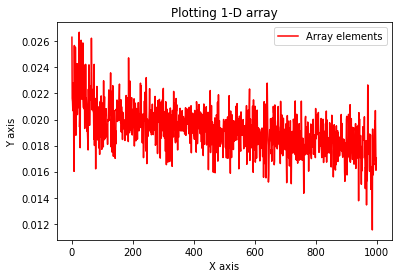

[array([[0.43478394]]), array([[0.41662897]]), array([[0.30603433]]), array([[0.41069769]]), array([[0.32272692]]), array([[0.40625484]]), array([[0.33894147]]), array([[0.32617565]]), array([[0.32361637]]), array([[0.36792403]]), array([[0.37593275]]), array([[0.39061718]]), array([[0.34696482]]), array([[0.32626362]]), array([[0.34877561]]), array([[0.36144434]]), array([[0.37865127]]), array([[0.45297276]]), array([[0.32353206]]), array([[0.31597378]]), array([[0.27800758]]), array([[0.34956276]]), array([[0.46764882]]), array([[0.43222544]]), array([[0.38896183]]), array([[0.34429968]]), array([[0.39373273]]), array([[0.37462462]]), array([[0.37663708]]), array([[0.41115875]]), array([[0.33268709]]), array([[0.38424814]]), array([[0.42332887]]), array([[0.3752894]]), array([[0.3756794]]), array([[0.33571387]]), array([[0.30953868]]), array([[0.32660007]]), array([[0.32742138]]), array([[0.33144734]]), array([[0.30242394]]), array([[0.41104628]]), array([[0.33905341]]), array([[0.32

In [189]:
# USES wdbc.data

# THE ONLY MAIN THAT MATTERS

# training data
#x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]], [[1,1]]])
#print(x_train)

#y_train = np.array([[[0]], [[1]], [[1]], [[0]], [[0]]])
#y_train = np.array([[[1, 0]], [[0, 1]], [[0, 1]], [[1, 0]], [[1, 0]]])
#print(len(x_train[0][0]))
x_train = X.reshape(len(X), len(X[0]), 1)
y_train = Y.reshape(len(Y), 1)

#print(x_train)
#print("length of input 0", len(x_train))
#print("length of input 1", len(x_train[0]))
#print("length of input 2", len(x_train[0][0]))


#if len(Y) == len(X): 
#  print("lol")

startTimeTotal = time.time()

# network
net = Network()


#net.add(Dense(2, 5))
#net.add(Activation(tanh, tanhDerv))
#net.add(Dense(5, 15))
#net.add(Activation(tanh, tanhDerv))
#net.add(Dense(15, 5))
#net.add(Activation(tanh, tanhDerv))
#net.add(Dense(5, 2))
#net.add(Activation(tanh, tanhDerv))

net.add(Dense(len(x_train[0]), 120))
net.add(Activation(tanh, tanhDerv))
#net.add(Dense(120, 120))
#net.add(Activation(tanh, tanhDerv))
net.add(Dense(120, 5))
net.add(Activation(tanh, tanhDerv))
net.add(Dense(5, 1))
net.add(Activation(tanh, tanhDerv))
#net.add(Dense(10, 1))
#net.add(Activation(tanh, tanhDerv))

# train
net.use(mse, mseDerv)

startTimeTrain = time.time()

#different gradient descent methods, min batch has an adjustable batch size 

#errorStore = net.fitSGD(x_train, y_train, epochs = 1000, learning_rate = 0.00001)
#errorStore = net.fitBatch(x_train, y_train, epochs = 1000, learning_rate = 0.00001)
errorStore = net.fitMinBatch(x_train, y_train, epochs = 1000, learning_rate = 0.001, batchSize = 50)
#endTimeHere = time.time()

endTimeTrain = time.time()
print("last error is ", errorStore[-1])
xPlot = np.array(range(0, 1000))
yPlot = errorStore
plt.title("Plotting 1-D array")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(xPlot, yPlot, color = "red", label = "Array elements")
plt.legend()
plt.show()
# test
#out = net.predict(x_train)

#print("Time taken is ", endTimeHere - startTime)

#print(y_train.T)

startTimePredict = time.time()

out = net.predict(x_train)

endTimePredict = time.time()
print(out)
#print(out[0])

def answerFn(out):
  p = np.zeros([len(x_train)])
  for i in range(len(x_train)):
    if out[i] < 0.5:
      p[i] = 0
    else:
      p[i] = 1
  return p

pred = answerFn(out)
expt = y_train.reshape(len(y_train)) * 1.0

# Accuracy calculation 

TP = 0
FP = 0
FN = 0
TN = 0

for i in range(len(pred)):
  if pred[i] == 1:
    if expt[i] == 1:
      TP += 1
    else:
      FP += 1
  elif pred[i] == 0:
    if expt[i] == 0:
      TN += 1
    else:
      FN += 1

accuracy = (TP + TN)/(TP+TN+FP+FN)

print("The classification accuracy is ", accuracy*100, "%")
endTimeTotal = time.time()


print("Total time = ", endTimeTotal - startTimeTotal)
print("Train time = ", endTimeTrain - startTimeTrain)
print("Predict time = ", endTimePredict - startTimePredict)

#print("pred ", pred)
#print("expect ", expt)

#useless comments below
#print(out[0])
#res = pd.DataFrame()
#expd = y_train.reshape(len(y_train)).T
#pred = out2
##pred = np.concatenate( out, axis=0 )
##pred = np.array(pred)
##pred = np.array(out).T
#print("expected ", expd)
#print("predicted ", pred)
#res = pd.DataFrame()
#res['Predictions'] = pred
#res['Expectation'] = expd
#print(res)
#print("Accuracy: ", res.loc[res['Predictions']==res['Expectation']].shape[0] / res.shape[0] * 100)

In [170]:
# Accuracy calculation 

TP = 0
FP = 0
FN = 0
TN = 0

for i in range(len(pred)):
  if pred[i] == 1:
    if expt[i] == 1:
      TP += 1
    else:
      FP += 1
  elif pred[i] == 0:
    if expt[i] == 0:
      TN += 1
    else:
      FN += 1

accuracy = (TP + TN)/(TP+TN+FP+FN)

print("The classification accuracy is ", accuracy*100, "%")


The classification accuracy is  87.32394366197182 %


In [ ]:
#out = net.predict(x_train)
#print("out ", out)
#print(out[0])

#def answerFn(out):
#  p = np.zeros([len(x_train)])
#  for i in range(len(x_train)):
#    if out[i] < 0.5:
#      p[i] = 0
#    else:
#      p[i] = 1
#  return p

#pred = answerFn(out)
#expt = y_train.reshape(len(y_train)) * 1.0
#print("pred ", pred)
#print("expect ", expt)

In [ ]:
# DO NOT RUN


# training data
#x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]], [[1,1]]])
#print(x_train)

#y_train = np.array([[[0]], [[1]], [[1]], [[0]], [[0]]])
#y_train = np.array([[[1, 0]], [[0, 1]], [[0, 1]], [[1, 0]], [[1, 0]]])
#print(len(x_train[0][0]))
x_train = X.reshape(len(X), len(X[0]), 1)
y_train = Y.reshape(len(Y), 1)

#print(x_train)
#print("length of input 0", len(x_train))
#print("length of input 1", len(x_train[0]))
#print("length of input 2", len(x_train[0][0]))


#if len(Y) == len(X): 
#  print("lol")

#startTime = time.time()

# network
net = Network()


#net.add(Dense(2, 5))
#net.add(Activation(tanh, tanhDerv))
#net.add(Dense(5, 15))
#net.add(Activation(tanh, tanhDerv))
#net.add(Dense(15, 5))
#net.add(Activation(tanh, tanhDerv))
#net.add(Dense(5, 2))
#net.add(Activation(tanh, tanhDerv))

net.add(Dense(len(x_train[0][0]), 20))
net.add(Activation(tanh, tanhDerv))
net.add(Dense(20, 1))
net.add(Activation(tanh, tanhDerv))
#net.add(Dense(10, 1))
#net.add(Activation(tanh, tanhDerv))

# train
net.use(mse, mseDerv)
errorStore = net.fit(x_train, y_train, epochs=2000, learning_rate=0.00001#)

#endTimeHere = time.time()

print("last error is ", errorStore[-1])
xPlot = np.array(range(0, 2000))
yPlot = errorStore
plt.title("Plotting 1-D array")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(xPlot, yPlot, color = "red", label = "Array elements")
plt.legend()
plt.show()
# test
#out = net.predict(x_train)

#print("Time taken is ", endTimeHere - startTime)
#print(out)
#print(y_train.T)
#out, out2 = net.predict(x_train)
#print(out[0])
#res = pd.DataFrame()
#expd = y_train.reshape(len(y_train)).T
#pred = out2
##pred = np.concatenate( out, axis=0 )
##pred = np.array(pred)
##pred = np.array(out).T
#print("expected ", expd)
#print("predicted ", pred)
#res = pd.DataFrame()
#res['Predictions'] = pred
#res['Expectation'] = expd
#print(res)
#print("Accuracy: ", res.loc[res['Predictions']==res['Expectation']].shape[0] / res.shape[0] * 100)


useful links

https://www.delftstack.com/howto/python/plot-array-python/
https://builtin.com/data-science/evaluating-classification-models
https://developers.google.com/machine-learning/crash-course/classification/accuracy
https://towardsdatascience.com/10-tips-for-a-better-google-colab-experience-33f8fe721b82
https://pythonbaba.com/python-code-to-find-2d-array-size/
https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

In [ ]:
# DO NOT RUN

#main 

X = np.reshape([[0,0], [0,1], [1,0], [1,1]], (4,2,1))
Y = np.reshape([[0], [1], [1], [0]], (4,1,1))

NN = [
    Dense(2, 3), 
    Tanh(), 
    Dense(3,1), 
    Tanh()
]

epoch = 1000
learnRate = 0.1

#train
for e in range(epoch):
  error = 0
  for x,y in zip(X,Y):
    
    #forward
    output = x
    for layer in NN:
      output = layer.forward(output)

    #error
    error += mse(y, output)

    #backward
    grad = mseDerv(y, output)
    for layer in reversed(NN):
      grad = layer.backward(grad, learnRate)

  error /= len(x)
  print('%d/%d, error=%f' %(e+1, epoch, error))



